technical support data...
past incidents given by customer
we have to improve customer satisfaction rate
we have data and problem statemnt..
more freequntly we have data and peoblm statement..
we dont have well defined data types and features and u have to build model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.cluster import KMeans

In [4]:
tech_df=pd.read_csv("C:/Users/Narasimha Rao/OneDrive/Desktop/tech.csv")

In [5]:
tech_df.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

for clusteeing also the demensions are numerical

In [6]:
tech_df.head(6)

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0


let us have a look into the data..all dimesions are must be in common scalee..we dont know the measuremnts.
datatypes is string is there for problem type.differnt types of problemm..hoe many columns on an average pending..howmany of them 
require rreplacement
let us extract some useful information

all the dimensions are on same scale


we have to apply zscore which works on numerical..but problem type is string type so we have to drop that..otherwise we will get errror


In [7]:
from scipy.stats import zscore

In [8]:
numeric_cols=tech_df.drop("PROBLEM_TYPE",axis=1)

all columns except PROBLRM_TYPE are copird to numeric_cols...drop does not remove from datafareme...

In [9]:
prob_type=tech_df.pop("PROBLEM_TYPE")

In [10]:
numeric_cols=numeric_cols.apply(zscore)

In [11]:
tech_df=numeric_cols.join(prob_type)

In [12]:
tech_df.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,PROBLEM_TYPE
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,Temperature control not working
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,power chord does not tightly fit
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,Fan swing not working
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,Main switch does not on
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,Forgot mobile app password


In [13]:
#to cluster the above  dataset..how to find the best k..one way is to use elbow method and second one is to use numerical  analysis
#forhis we use seaborn pairplot function..diagnoal is density estimates
import seaborn as sns


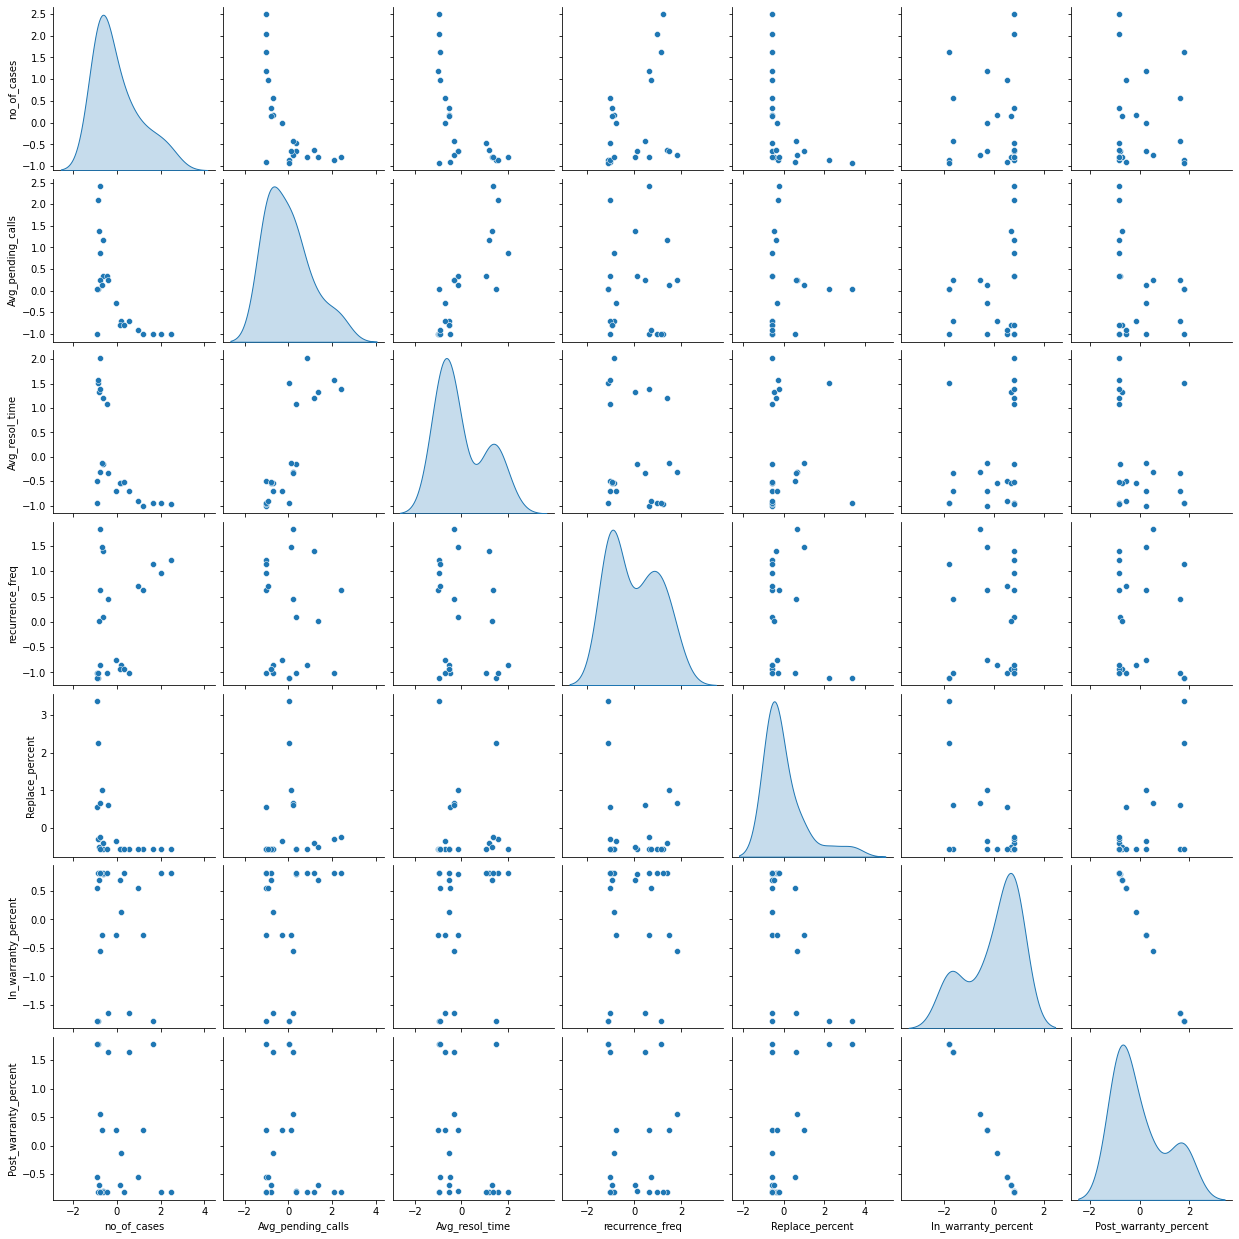

In [15]:
sns.pairplot(numeric_cols,diag_kind="kde")

In [15]:
#in the above diagram..we hav to concentrate on density diagonals..gaussians are there..in most of the diagonals 3 gaussians are thre
tech_df_at=tech_df.drop("PROBLEM_TYPE",axis=1)

In [16]:
#we see that in one dimensions 3 and in other dimensions 2...the best one is to find toatl gaussins be 3*2=6...3 minimum and 6 maximum..in the range 3 to 6
from scipy.spatial.distance import cdist


In [17]:
clusters=range(1,10)

In [18]:
meanDistortions=[]

In [20]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(tech_df_at)
    predictions=model.predict(tech_df_at)
    meanDistortions.append(sum(np.min(cdist(tech_df_at,model.cluster_centers_, 'euclidean'), axis=1)) / tech_df_at.shape[0])
    

C:\Users\Lalitha\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


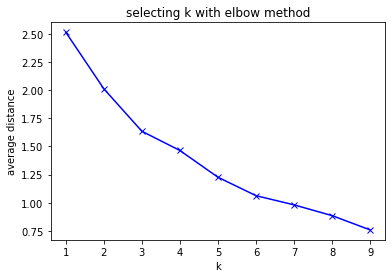

In [21]:
plt.plot(clusters,meanDistortions,'bx-')
plt.xlabel('k')
plt.ylabel('average distance')
plt.title("selecting k with elbow method")
plt.show()

In [22]:
#the drop of the SSE on y axis is there after k=5
#the magnituide of SSE is changed
#in the above diagram there is no proper bends..lets start with k=2

f_model=KMeans(2)
f_model.fit(tech_df_at)
predictions=f_model.predict(tech_df_at)


In [25]:
tech_df["GROUP"]=predictions
print("group assigned:\n")
tech_df[["PROBLEM_TYPE","GROUP"]]

group assigned:



,PROBLEM_TYPE,GROUP
0,Temperature control not working,0
1,power chord does not tightly fit,0
2,Fan swing not working,0
3,Main switch does not on,0
4,Forgot mobile app password,1
5,AC stops abruptly,1
6,App hangs while entring commands,1
7,App takes a long time to initialize,0
8,Unable to connect the App to the device,0
9,Reinstalling the app hangs the phone,1


In [26]:
tech_df.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,PROBLEM_TYPE,GROUP
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,Temperature control not working,0
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,power chord does not tightly fit,0
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,Fan swing not working,0
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,Main switch does not on,0
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,Forgot mobile app password,1


array([[<AxesSubplot:title={'center':'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Avg_resol_time'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'In_warranty_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Replace_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'no_of_cases'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'recurrence_freq'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

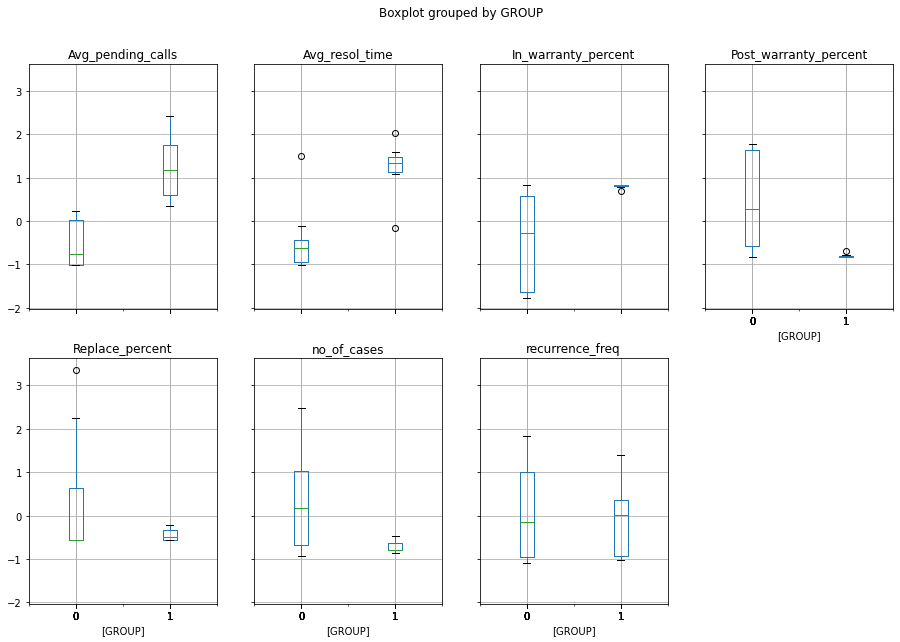

In [28]:
tech_df.boxplot(by='GROUP',layout=(2,4),figsize=(15,10))

In [29]:
f_model=KMeans(3)
f_model.fit(tech_df_at)
predictions=f_model.predict(tech_df_at)
tech_df["GROUP"]=predictions
print("group assigned:\n")
tech_df[["PROBLEM_TYPE","GROUP"]]


group assigned:



,PROBLEM_TYPE,GROUP
0,Temperature control not working,0
1,power chord does not tightly fit,2
2,Fan swing not working,0
3,Main switch does not on,2
4,Forgot mobile app password,1
5,AC stops abruptly,1
6,App hangs while entring commands,1
7,App takes a long time to initialize,0
8,Unable to connect the App to the device,0
9,Reinstalling the app hangs the phone,1


array([[<AxesSubplot:title={'center':'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Avg_resol_time'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'In_warranty_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Replace_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'no_of_cases'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'recurrence_freq'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

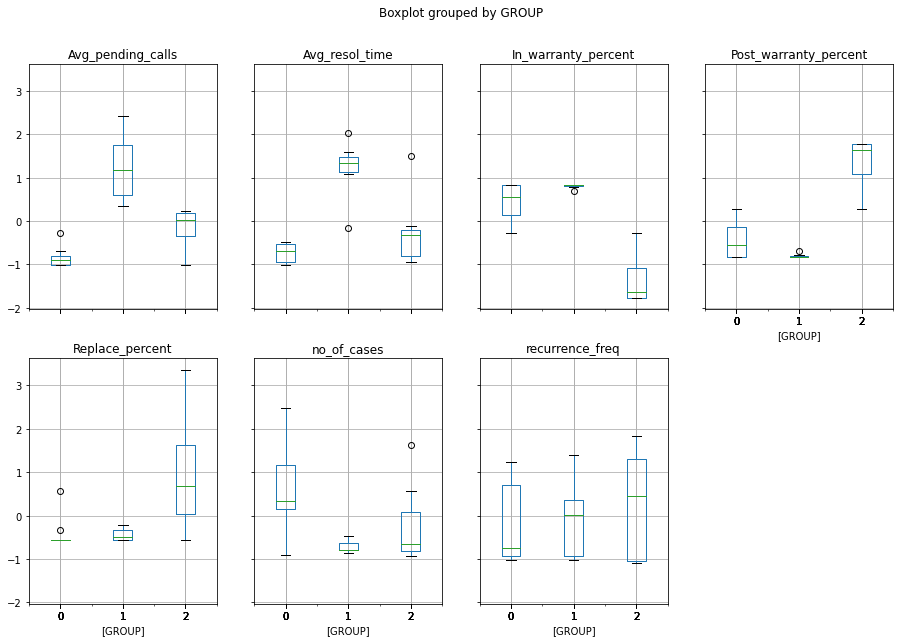

In [30]:
tech_df.boxplot(by='GROUP',layout=(2,4),figsize=(15,10))